<a href="https://colab.research.google.com/github/jhbeann/Bigdata_R/blob/main/Chapter3_section2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SECTION 02. 지도학습 - 분류



### 1 . 의사결정나무 이용한 타이타닉 생존자 분류(예측) 분석 수행

In [ ]:
library(dplyr)
library(ggplot2)
# 의사결정나무 분류모델 위한 패키지 import
library(class)

In [ ]:
# 데이터 불러오기
df <- read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
 stringsAsFactors = TRUE)

 # stringsAsFactors = TRUE : 문자열을 factor 형으로 가져오기

head(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [ ]:
summary(df)  # df 기술통계 및 결측치 확인

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [ ]:
# 데이터 전처리
# Age 컬럼의 결측값을 평균으로 대치
d_mean = mean(df$Age, na.rm = TRUE)  # 결측값 제외한 평균
df$Age = ifelse(is.na(df$Age), d_mean, df$Age)  # 평균으로 대치


# Embarked 컬럼의 결측값을 최빈값 s로 대치
df$Embarked = replace(df$Embarked, df$Embarked == "", "S")

- 레이블 인코딩 : 카테고리 값을 코드형 숫자로 변환
- R의 factor() 사용 -> 컬럼의 값을 1,2,3 으로 인코딩하고 
  as.numeric() 이용해 숫자로 변환

In [ ]:
# sex 컬럼 : 레이블 인코딩
# male:1, female:2
df$Sex <- as.numeric(factor(df$Sex), level = c("male","female"))

# Embarked : 레이블 인코딩
df$Embarked <- as.numeric(factor(df$Embarked), level = c("C","Q","S"))

str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : num  2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : num  3 1 3 3 3 2 3 3 3 1 ...


In [ ]:
# family_size 파생변수 생성
# SibSp + Parch ( 동승자가족수 형제또는 배우자 + 부모 또는 자녀수)

df$family_size <- df$SibSp + df$Parch

In [ ]:
head(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",2,22.00000,1,0,A/5 21171,7.2500,,3,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.00000,1,0,PC 17599,71.2833,C85,1,1
3,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,,3,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,3,1
5,5,0,3,"Allen, Mr. William Henry",2,35.00000,0,0,373450,8.0500,,3,0
6,6,0,3,"Moran, Mr. James",2,29.69912,0,0,330877,8.4583,,2,0


#### 데이터셋 준비
- 타이타닉의 목표변수(종속변수)는 survived
- 탑승자 생존과 무관한 아이디,이름, 티켓번호는 분석에서 제외
- 파생변수 만든 sibsp, parch 제외

** 정리 **
- 분석결과에 영향 없는 변수는 제외하고 나머지 변수로 데이터셋 재구성


In [ ]:
df <-df[,c("Survived","Pclass","Sex","Age","Fare","Embarked","family_size")]
head(df)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,3,2,22.00000,7.2500,3,1
2,1,1,1,38.00000,71.2833,1,1
3,1,3,1,26.00000,7.9250,3,0
4,1,1,1,35.00000,53.1000,3,1
5,0,3,2,35.00000,8.0500,3,0
6,0,3,2,29.69912,8.4583,2,0


#### 데이터셋 분리
sample()
- 학습/테스트 데이터셋 분리

In [ ]:
# 난수 발생 위해 seed 값
set.seed(123)

# 80%를 인덱스
idx <- sample(1:nrow(df),0.8*nrow(df))

# 인덱스 해당 행을 학습 데이터로
df_train <- df[idx,]
# 나머지 행을 테스트 데이터로
df_test <- df[-idx,]

In [ ]:
print(dim(df_train))

print(dim(df_test))

[1] 712   7
[1] 179   7


* 분류를 위한 알고리즘 : **의사결정나무**
  - rpart()
  - method="class"


In [ ]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model <- rpart(Survived~., method = "class", data = df_train)

In [ ]:
# 학습된 모델을 기반으로 예측 수행
# survived 열 제외
pred <- predict(model, df_test[,-1],type="class")

In [ ]:
# 예측 결과와 실제값을 비교(오차행렬)
cm <- table(df_test$Survived, pred)
print(cm)

# 모델평가 - 정확도
acc <- (cm[1,1] + cm[2,2])/ nrow(df_test)
print(acc)

   pred
     0  1
  0 95 15
  1 20 49
[1] 0.8044693


#### 4) 의사결정나무 최적화
- 최적화 
  - 가지치기
  - 의사결정나무 크기 정하기 : CP
    - printcp()
      - nsplit : 분할횟수
      - xerror : 교차검증시 오류율
      - xstd   : 교차검증의 편차
      


In [ ]:
printcp(model)



Classification tree:
rpart(formula = Survived ~ ., data = df_train, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex   

Root node error: 273/712 = 0.38343

n= 712 

        CP nsplit rel error  xerror     xstd
1 0.450549      0   1.00000 1.00000 0.047524
2 0.032967      1   0.54945 0.54945 0.039858
3 0.025641      3   0.48352 0.52747 0.039260
4 0.014652      4   0.45788 0.49451 0.038314
5 0.010000      6   0.42857 0.50183 0.038529


- xerror  가장 낮을 때
  - nsplit : 4 -->  의사결정나무 최적 :4
  - cp :0.014 --> 조금 큰 값 0.015를 prune() 함수로 전달


Classification tree:
rpart(formula = Survived ~ ., data = df_train, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex   

Root node error: 273/712 = 0.38343

n= 712 

        CP nsplit rel error  xerror     xstd
1 0.450549      0   1.00000 1.00000 0.047524
2 0.032967      1   0.54945 0.54945 0.039858
3 0.025641      3   0.48352 0.52747 0.039260
4 0.015000      4   0.45788 0.49451 0.038314


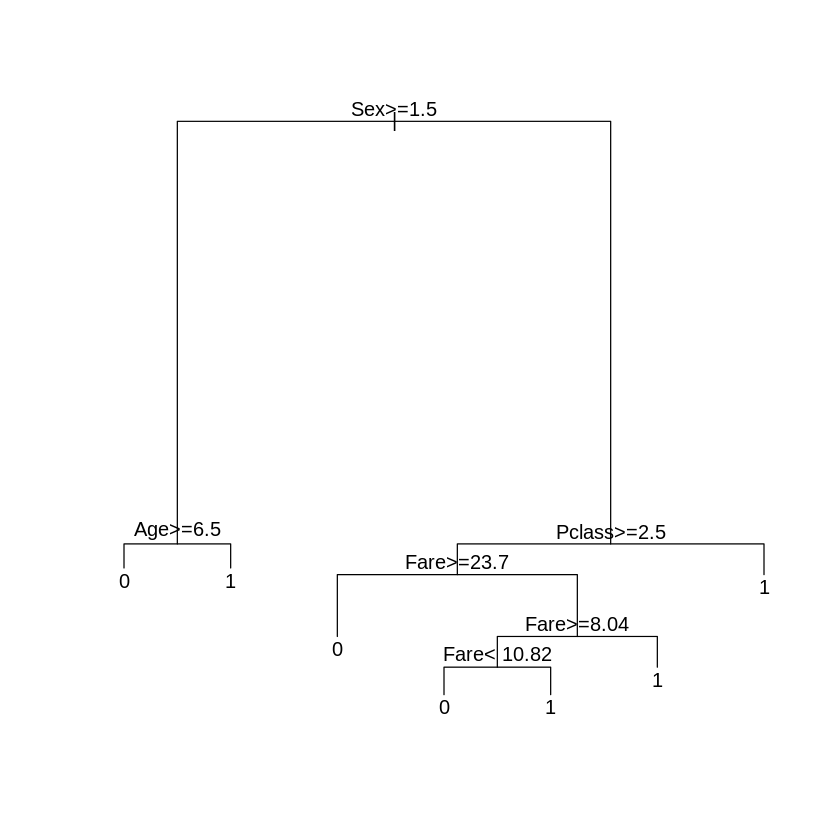

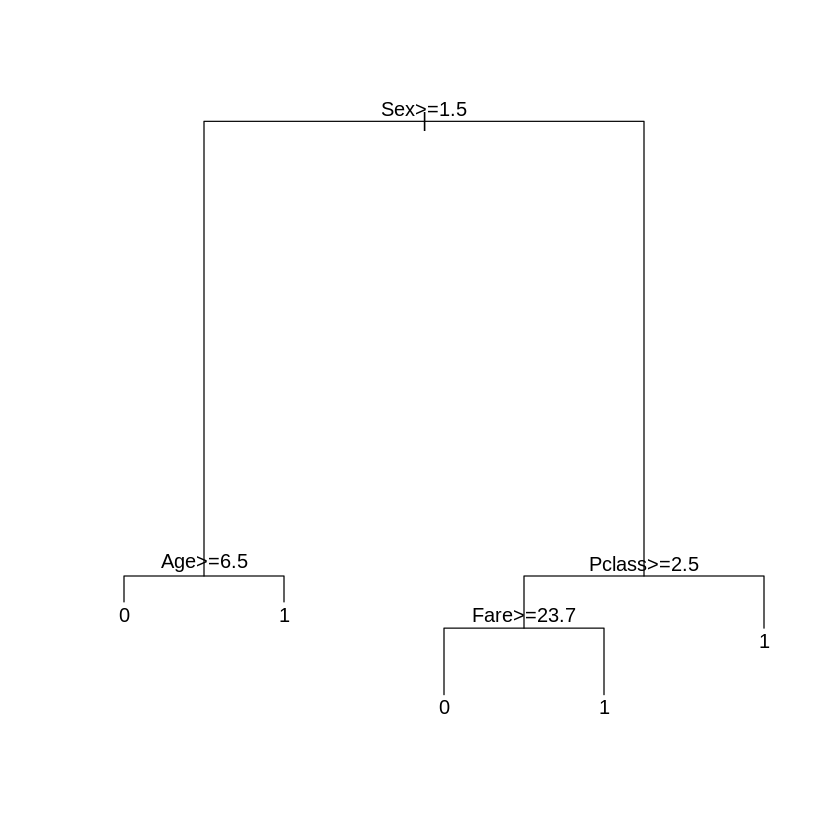

In [ ]:
# 의사결정나무 가지치기(최적화)
# 최적의 cp 보다 조금 큰 값으로

model_opt <- prune(model, cp=0.015)
printcp(model_opt)

plot(model);text(model)
plot(model_opt);text(model_opt) # 분할 횟수가 4인 모델

### 2. KNN 이용한 분류  

In [ ]:
library(dplyr)
library(ggplot2)

# knn 위한 패키지
library(class)

In [ ]:
# 아이리스 
df<- read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
head(df)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


In [ ]:
summary(df)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [ ]:
# 결측치 처리
sum(is.na(df))

[1] 0

In [ ]:
table(df$species)


    setosa versicolor  virginica 
        50         50         50 

In [ ]:
# Min-Max  정규화 함수 정의
normal <- function(x) (
  return((x-min(x))/max(x)-min(x))
)

# 정규화 함수 적용
# lapply : 
df[1:4] <- as.data.frame(lapply(df[1:4], normal))
summary(df)

  sepal_length     sepal_width      petal_length      petal_width     
 Min.   :-4.300   Min.   :-2.000   Min.   :-1.0000   Min.   :-0.1000  
 1st Qu.:-4.199   1st Qu.:-1.818   1st Qu.:-0.9130   1st Qu.:-0.0200  
 Median :-4.110   Median :-1.773   Median :-0.5145   Median : 0.3800  
 Mean   :-4.105   Mean   :-1.760   Mean   :-0.6003   Mean   : 0.3397  
 3rd Qu.:-4.034   3rd Qu.:-1.705   3rd Qu.:-0.4058   3rd Qu.: 0.5800  
 Max.   :-3.844   Max.   :-1.455   Max.   :-0.1449   Max.   : 0.8600  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [ ]:
# 학습용 데이터, 테스트용 데이터셋 분리 => sample() 사용

# 난수 발생 위한 seed 값 부여
set.seed(123)

# 80% 행 인덱스 선덩
idx <- sample(1:nrow(df), 0.8*nrow(df))

X_train <- df[idx, 1:4]
y_train <- df[idx, 5]  # 종속변수

#인덱스 해당하지 않는 행 : 테스트 데이터
X_test <- df[-idx,1:4]
y_test <- df[-idx,5]


In [ ]:
print(dim(X_train))
print(dim(X_test))

print(dim(data.frame(y_train)))
print(dim(data.frame(y_test)))

[1] 120   4
[1] 30  4
[1] 120   1
[1] 30  1


- knn(train,test,cl,k=10,l=0,prob=FALSE)
  - train : 훈련 데이터셋
  - test : 테스트 데이터셋
  - cl : 훈련 데이터셋의 그룹,정보
  - k : 이웃 수
  - l : 최소 유효 수
  - prob : True 인 경우 prob 속성에서 당첨된 비율을 반환

In [ ]:
# knn 학습
model <- knn(train=X_train, test = X_test, cl = y_train, k=3)

table(factor(model))


    setosa versicolor  virginica 
        10         14          6 

In [ ]:
# 모델평가-오차행렬
c_mat <- table(y_test, model)
c_mat

            model
y_test       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         14         1
  virginica       0          0         5

In [ ]:
# 모델평가-정확도
acc <- (c_mat[1,1] +c_mat[2,2] +c_mat[3,3])/nrow(X_test)
acc

[1] 0.9666667

In [ ]:
model2 <- knn(train=X_train, test = X_test, cl = y_train, k=6)

table(factor(model2))
c_mat2 <- table(y_test, model)
c_mat2

acc2 <- (c_mat2[1,1] +c_mat2[2,2] +c_mat2[3,3])/nrow(X_test)
acc2


    setosa versicolor  virginica 
        10         14          6 

            model
y_test       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         14         1
  virginica       0          0         5

[1] 0.9666667

k=3 -> 0.966666666666667                                             
k=6 -> 0.966666666666667                
k=9 ->0.966666666666667                            

### 3. SVM

In [ ]:
library(dplyr)
library(ggplot2)

# SVM 분류모델 위한 패키지 설치와 임포트
install.packages("e1071")
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", stringsAsFactors=TRUE)
head(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [ ]:
d_mean = mean(df$Age, na.rm = TRUE)
df$Age = ifelse(is.na(df$Age), d_mean, df$Age)

df$Embarked = replace(df$Embarked, df$Embarked=="","S")
df$FamilySize <- df$SibSp + df$Parch

In [ ]:
# sex , Embarked 컬럼 원-핫 인코딩
# 원-핫 인코딩 : 범주형 데이터를 숫자로 변형 (0,1 로만 표시.단순.)
df <- mutate(df, Male = ifelse(df$Sex=="male",1,0))
df <- mutate(df,Female = ifelse(df$Sex=="female",1,0))

df <- mutate(df,C = ifelse(df$Embarked=="C",1,0))
df <- mutate(df,Q = ifelse(df$Embarked=="Q",1,0))
df <- mutate(df,S= ifelse(df$Embarked=="S",1,0))

head(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Male,Female,C,Q,S
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,,S,1,1,0,0,0,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,1,1,0,0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,,S,0,0,1,0,0,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,1,0,1,0,0,1
5,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,,S,0,1,0,0,0,1
6,6,0,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,,Q,0,1,0,0,1,0


In [ ]:
# 분석 결과에 영향 없는 변수 제거. 나머지로 재구성
df <- df[,c("Survived","Pclass","Male","Female","Age","Fare","C","Q","S","FamilySize")]

In [ ]:
# 난수 발생 위한 seed 값 부여
set.seed(123)

idx <- sample(1:nrow(df),0.7*nrow(df))
df_train <- df[idx,]
df_test <-df[-idx,]

print(dim(df_train))
print(dim(df_test))


[1] 623  10
[1] 268  10


In [ ]:
model <- svm(Survived~.,data = df_train, type ="C-classification")
pred <- predict(model, df_test, type = "class")

cm <- table(df_test$Survived, pred)
print(cm)

acc <- (cm[1,1] +cm[2,2])/ nrow(df_test)
print(acc)

   pred
      0   1
  0 148  20
  1  30  70
[1] 0.8134328


In [ ]:
model <- svm(Survived~., data = df_train, kernel = "radial", gamma = 0.01, cost = 10, type ="C-classification")

- svm 파라미터 조정
  - cost 값의 예
  - gamma  값의 예
  

In [ ]:
pred <- predict(model, df_test, type="class")
cm<- table(df_test$Survived,pred)
print(cm)

acc<-(cm[1,1]+cm[2,2])/nrow(df_test)
print(acc)

   pred
      0   1
  0 145  23
  1  29  71
[1] 0.8059701


4. 로지스틱 회귀 위한 문제해결
-  y = sigmoid
-  0~1


In [1]:
library(dplyr)
library(ggplot2)

# 로지스틱 회귀 분류모델 위한 임포트
library(nnet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
df<- read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
str(df)
summary(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [5]:
# 전처리
sum(is.na(df))

[1] 0

In [6]:
table(df$species)


    setosa versicolor  virginica 
        50         50         50 

In [7]:
# min-max 정규화

normal <-function(x)(
    return((x-min(x))/(max(x)-min(x)))
)

# 정규화 함수 적용

df[1:4] <- as.data.frame(lapply(df[1:4],normal))

summary(df)

  sepal_length     sepal_width      petal_length     petal_width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

In [8]:
set.seed(123)
idx <- sample(1:nrow(df),0.8*nrow(df))

train_dataset <-df[idx,1:5]
test_dataset <-df[-idx,1:5]

print(dim(train_dataset))
print(dim(test_dataset))

[1] 120   5
[1] 30  5


### 4. 로지스틱 회귀
 - multinom(formula, data)
 - formula: 함수식(종속변수~독립변수1 + 독립변수2)
 - data: 학습 데이터셋(데이터 프레임)


In [9]:
# 로지스틱 회귀 모델 학습
# 독립변수 X_train, 종속변수 y_train으로 학습
model <- multinom(formula = species ~ sepal_length +sepal_width + petal_length + petal_width,
data = train_dataset)

fitted(model)


# weights:  18 (10 variable)
initial  value 131.833475 
iter  10 value 13.518787
iter  20 value 4.708637
iter  30 value 3.368639
iter  40 value 2.934471
iter  50 value 2.692612
iter  60 value 2.619843
iter  70 value 2.404755
iter  80 value 2.368683
iter  90 value 2.253571
iter 100 value 2.206298
final  value 2.206298 
stopped after 100 iterations


,setosa,versicolor,virginica
14,1.000000e+00,3.281873e-08,1.587809e-52
50,9.999973e-01,2.735069e-06,7.801278e-51
118,9.626793e-24,1.199338e-12,1.000000e+00
43,1.000000e+00,1.915765e-08,2.856899e-51
150,2.488589e-10,2.447711e-04,9.997552e-01
148,1.067095e-14,4.308072e-05,9.999569e-01
90,1.027061e-05,9.999897e-01,2.676168e-08
91,1.493468e-04,9.998464e-01,4.229918e-06
143,9.162982e-15,3.665186e-07,9.999996e-01
92,5.476620e-06,9.999924e-01,2.149935e-06


In [11]:
result <-predict(model, newdata = test_dataset,type ="class")
correct_model <- sum(result == test_dataset$species)/nrow(test_dataset)

c_mat<-xtabs(~ result + test_dataset$species)
c_mat

acc <- (c_mat[1,1]+c_mat[2,2]+c_mat[3,3])/ nrow(test_dataset)
acc

# versicolor 를 virginica로 잘못 분류// 97%의 정확도로 분류(ㅇㅖ측함)

            test_dataset$species
result       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         14         0
  virginica       0          1         5

[1] 0.9666667

### 5. 랜덤 포레스트를 이용한 분류 문제 해결
- 다수 의사결정 트리들 배깅하여 분류,회귀 수행하는 앙상블 기법
(배깅 : 같은 종류 알고리즘 모델 여러개 결합하여 예측)

In [12]:
# 랜덤포레스트를 이용한 타이타닉 생존자 분류 예측 방법

install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [13]:
df = read.csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", stringsAsFactors=TRUE)



In [14]:
# 결측치 확인
summary(df)
# Age :NA// Embarked:빈칸/ Cabin:빈칸

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [15]:
# Age 컬럼의 결측값을 평균으로 대치
d_mean = mean(df$Age, na.rm = TRUE)
df$Age = ifelse(is.na(df$Age),d_mean, df$Age)

# Embarked  컬럼 결측값은 최빈값 s로 대체
df$Embarked = replace(df$Embarked,df$Embarked=="","S")

In [16]:
# sex 컬럼 레이블 인코딩
df$Sex <- as.numeric(factor(df$Sex), level =c("male","female"))

df$Embarked <- as.numeric(factor(df$Embarked),level = c("C","Q","S"))

# R의 factor 함수를 사용해 컬럼의 값을 1,2,3 으로 인코딩 하고 그 다음에 숫자로 변경(as.numeric)

In [17]:
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : num  2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : num  3 1 3 3 3 2 3 3 3 1 ...


In [19]:
df$FamilySize <- df$SibSp + df$Parch
head(df,3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<dbl>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7.2500,,3,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38,1,0,PC 17599,71.2833,C85,1,1
3,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,,3,0


In [20]:
# 분석 데이터셋 준비
df <-df[,c("Survived","Pclass","Sex","Age","Fare","Embarked","FamilySize")]
head(df,3)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,3,2,22,7.2500,3,1
2,1,1,1,38,71.2833,1,1
3,1,3,1,26,7.9250,3,0


In [21]:
# 데이터 분리
set.seed(123)
idx <-sample(1:nrow(df),0.8*nrow(df))
df_train <- df[idx,]
df_test <- df[-idx,]

print(dim(df_train))
print(dim(df_test))

[1] 712   7
[1] 179   7


In [22]:
df_train$Survived <- as.factor(df_train$Survived)
model <- randomForest(Survived~., data = df_train)


In [23]:
pred <- predict(model, newdata = df_test, type = "class")

In [24]:
cm <- table(df_test$Survived,pred)
print(cm)

acc <-(cm[1,1] + cm[2,2])/ nrow(df_test)

print(acc)

   pred
     0  1
  0 99 11
  1 19 50
[1] 0.8324022
